In [1]:
import numpy as np

In [2]:
x=[2,4,6,8]
y=[81,93,91,97]
mx=np.mean(x)
my=np.mean(y)

In [5]:
#기울기 공식의 분모
divisor= sum([(i-mx)**2 for i in  x])
divisor

20.0

In [6]:
#기울기 공식의 분자
def top(x,mx,y,my):
    s=0
    for i in range(len(x)):
        s+=(x[i]-mx)*(y[i]-my)
    return s
dividend=top(x,mx,y,my)
dividend

46.0

In [7]:
#기울기
w= dividend/divisor
#y절편(bias)
b=my-(mx*w)

In [8]:
print("기울기=",w)
print("y절편 b=",b)

기울기= 2.3
y절편 b= 79.0


In [10]:
#기울기와 y절편이 각각 3, 76이라고 가정
ab=[3,76]
#x데이터(공부시간), y데이터(성적)
data=[[2,81], [4,93], [6,91], [8,97]]
x=[i[0] for i in data]
y=[i[1] for i in data]
# x=[2,4,6,8]
# y=[81,93,91,97]

In [11]:
def predict(x):       #y=ax+b => y=3*x+76
    return ab[0]*x+ab[1]

#mse 함수
def mse(y, yhat): #실제값, 예측값 mean squared error
    return ((y-yhat)**2).mean()

def mseVal(y, res):  
    return mse(np.array(y),np.array(res))

In [18]:
y # 실제값
 # 예측값 = 3x+76
res=[]
for i in range(len(x)):
    res.append(predict(x[i]))
    print("공부시간=%.f 실제점수=%.f 예측점수=%.f" %(x[i],y[i],predict(x[i])))
#res #예측값

#mse 출력
#mse(np.array(res),np.array(y))

mseVal(res,y)

공부시간=1 실제점수=1 예측점수=79
공부시간=2 실제점수=1 예측점수=82
공부시간=3 실제점수=1 예측점수=85


6567.0

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
data=[[2,81], [4,93], [6,91], [8,97]]
x=[i[0] for i in data]
y=[i[1] for i in data]

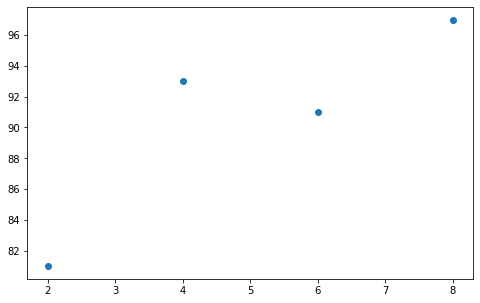

In [60]:
plt.figure(figsize=(8,5))
plt.scatter(x,y)
plt.show()

In [61]:
import tensorflow as tf

In [62]:
epochs=2001 #전체 데이터를 2001번 반복
lr=0.03 #학습률
xdata=np.array(x)
ydata=np.array(y)
#기울기, 절편 초기화
a=0
b=0

In [58]:
#경사 하강법
for i in range(epochs):
    yhat=a*xdata+b #y 예측값
    error=ydata-yhat #오차
    aDiff=-(2/len(xdata))*sum(xdata*error) #오차함수를 a로 미분한 값
    bDiff=-(2/len(xdata))*sum(error) #오찬함수를 b로 미분한 값
    a=a-lr*aDiff #학습률을 곱해서 기존의 a값을 갱신
    #W:=W - alpha * cost함수를 w로 편미분
    b=b-lr*bDiff #학습률을 곱해서 기존의 b값을 갱신    
    if i%100==0:
        print("에폭=%.f, 기울기=%.4f, 절편=%.4f"%(i,a,b))


TypeError: can't multiply sequence by non-int of type 'numpy.float64'

In [26]:
# a2=np.array([1,2,3])
# a3=np.array([1,1,1])
# a2-a3 #벡터화연산

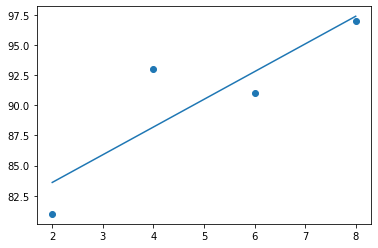

In [36]:
ypred=a*xdata+b #우리가 만든 모델의 예측값
plt.scatter(x,y)
plt.plot([min(xdata),max(xdata)],[min(ypred),max(ypred)])
plt.show()

In [37]:
#자동 경사하강법 실습
data=[[2,81], [4,93], [6,91], [8,97]]
x=[i[0] for i in data]
y=[i[1] for i in data]


In [40]:
x=tf.constant(35)
y=tf.Variable(x+5)
y

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=40>

In [66]:
import tensorflow.compat.v1 as tf # 1.xxversion을 사용
tf.disable_v2_behavior() #2.xx version 기능 사용불가
#tf 1.xx version -> 2.xx version

In [56]:
x=tf.placeholder("float",[None,3])
y=x*2
with tf.Session() as sess:
    xdata=[[1,2,3], [4,5,6]]
    res=sess.run(y,feed_dict={x:xdata})
    print(res)

[[ 2.  4.  6.]
 [ 8. 10. 12.]]


In [68]:
#자동 경사하강법 실습
data=[[2,81], [4,93], [6,91], [8,97]]
x=[i[0] for i in data]
y=[i[1] for i in data]

In [88]:
w=tf.Variable(tf.random_uniform([1],0,10,seed=20200714))
b=tf.Variable(tf.random_uniform([1],0,100,seed=20200714))

In [93]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

hf=w*x+b
#print(sess.run(hf))
rmse=tf.sqrt(tf.reduce_mean(tf.square(hf-y)))
train=tf.train.GradientDescentOptimizer(0.01).minimize(rmse)

In [87]:
#print(w)

print(sess.run(w))

[1.9601321]


In [95]:
for step in range(2001):
    sess.run(train)
    if step%100==0:
        print("에폭=%.f, rmse=%.f, 기울기=%.4f, 절편=%.4f" % 
              (step, sess.run(rmse),
               sess.run(w),sess.run(b)))

에폭=0, rmse=61, 기울기=2.0605, 절편=19.6213
에폭=100, rmse=38, 기울기=6.7596, 절편=20.6102
에폭=200, rmse=26, 기울기=10.0338, 절편=21.4759
에폭=300, rmse=24, 기울기=11.3072, 절편=22.0807
에폭=400, rmse=23, 기울기=11.6210, 절편=22.5373
에폭=500, rmse=23, 기울기=11.6560, 절편=22.9481
에폭=600, rmse=23, 기울기=11.6164, 절편=23.3466
에폭=700, rmse=23, 기울기=11.5573, 절편=23.7417
에폭=800, rmse=23, 기울기=11.4931, 절편=24.1359
에폭=900, rmse=22, 기울기=11.4275, 절편=24.5298
에폭=1000, rmse=22, 기울기=11.3617, 절편=24.9237
에폭=1100, rmse=22, 기울기=11.2957, 절편=25.3174
에폭=1200, rmse=22, 기울기=11.2297, 절편=25.7111
에폭=1300, rmse=22, 기울기=11.1638, 절편=26.1048
에폭=1400, rmse=22, 기울기=11.0978, 절편=26.4985
에폭=1500, rmse=21, 기울기=11.0319, 절편=26.8920
에폭=1600, rmse=21, 기울기=10.9659, 절편=27.2855
에폭=1700, rmse=21, 기울기=10.9000, 절편=27.6790
에폭=1800, rmse=21, 기울기=10.8341, 절편=28.0724
에폭=1900, rmse=21, 기울기=10.7682, 절편=28.4657
에폭=2000, rmse=21, 기울기=10.7023, 절편=28.8589


In [142]:
x=[1, 2, 3] # 20
y=[5, 15, 20]
#hf=3.4 * x + 51    w:3.4, b:51
w=tf.Variable(tf.random_uniform([1],-1,1))
b=tf.Variable(tf.random_uniform([1],-1,1))

In [143]:
hf=w*x+b
cost=tf.reduce_mean((hf-y)**2)

In [144]:
opt=tf.train.GradientDescentOptimizer(learning_rate=0.1)
train=opt.minimize(cost)
#W:=W-alpha* w편미분 cost(w,b)
#alpha=learning rate

In [145]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [146]:
for i in range(2001):
    #print(sess.run(w), sess.run(b), sess.run(cost))
    #hf=0.29 * 3 -0.18
    #cost=tf.reduce_mean((0.69-20)**2) = 203
    #                   [23 220 390]
    sess.run(train)
#    print(sess.run(w), sess.run(b), sess.run(cost))
    #if i % 20==0:
#         print(i, sess.run(cost))
print(sess.run(w),sess.run(b),sess.run(cost))

print("x가 5일때 예측값:", )
#hf=w*x+b

[7.499997] [-1.666661] 1.3888899


In [148]:
###x데이터가 입력되었을때 y값을 예측하시오.
#x가 7, 11일때 y?
xx=[1,2,3]
yy=[2,5,7]

w=tf.Variable(tf.random_uniform([1],-1,1))
b=tf.Variable(tf.random_uniform([1],-1,1))
x=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)

In [149]:
hf=w*x+b
cost=tf.reduce_mean((hf-y)**2)

In [150]:
opt=tf.train.GradientDescentOptimizer(0.1)
train=opt.minimize(cost)

In [151]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [154]:
for i in range(2001):
    sess.run(train, feed_dict={x:xx, y:yy})
    if i % 20==0:
        print(i, sess.run(cost, feed_dict={x:xx, y:yy}))    
   

0 0.105992414
20 0.073506944
40 0.0623381
60 0.058118206
80 0.056523796
100 0.055921327
120 0.0556938
140 0.055607807
160 0.055575293
180 0.055562984
200 0.055558372
220 0.05555662
240 0.055555906
260 0.05555576
280 0.055555638
300 0.055555552
320 0.05555551
340 0.055555608
360 0.055555586
380 0.055555582
400 0.055555582
420 0.055555556
440 0.055555552
460 0.055555552
480 0.05555561
500 0.055555552
520 0.055555526
540 0.055555608
560 0.055555608
580 0.055555608
600 0.055555608
620 0.055555608
640 0.055555608
660 0.055555608
680 0.055555608
700 0.055555608
720 0.055555608
740 0.055555608
760 0.055555608
780 0.055555608
800 0.055555608
820 0.055555608
840 0.055555608
860 0.055555608
880 0.055555608
900 0.055555608
920 0.055555608
940 0.055555608
960 0.055555608
980 0.055555608
1000 0.055555608
1020 0.055555608
1040 0.055555608
1060 0.055555608
1080 0.055555608
1100 0.055555608
1120 0.055555608
1140 0.055555608
1160 0.055555608
1180 0.055555608
1200 0.055555608
1220 0.055555608
1240 0.055

In [161]:
print(sess.run(w))
print(sess.run(b))
#hf= 2.5 * x - 0.33
#x가 7, 11일때 y값을 예측
# print("7:", sess.run(w)*7+sess.run(b))
# print("11:", sess.run(w)*11+sess.run(b))

#print("7:", sess.run(hf, feed_dict={x:7}))
print("7, 11:", sess.run(hf, feed_dict={x:[7,11]}))


[2.4999993]
[-0.33333185]
7, 11: [17.166662 27.16666 ]
